In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "hbase"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 39
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hbase,0,1,0.804878,0.478261,0.600000,0.821330,0.670115,0.757888,0.938931,base
1,hbase,0,2,0.890909,0.408333,0.560000,0.815052,0.614580,0.852534,0.925000,base
2,hbase,0,3,1.000000,0.363636,0.533333,0.861735,0.603023,0.944413,1.000000,base
3,hbase,0,4,0.957447,0.338346,0.500000,0.846033,0.572928,0.912973,0.970149,base
4,hbase,0,5,0.800000,0.336449,0.473684,0.764044,0.551261,0.754266,0.903226,base


In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hbase,15,16,0.725490,0.795699,0.758974,0.849312,0.766472,0.864486,0.738318,ecoselekt
1,hbase,15,17,0.814815,0.814815,0.814815,0.878120,0.798549,0.897724,0.782609,ecoselekt
2,hbase,15,18,0.793103,0.814159,0.803493,0.845336,0.767830,0.886637,0.724138,ecoselekt
3,hbase,15,19,0.742424,0.875000,0.803279,0.847149,0.732756,0.859458,0.613636,ecoselekt
4,hbase,15,20,0.732283,0.837838,0.781513,0.823970,0.719559,0.843745,0.617978,ecoselekt


In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hbase,15,16,0.760000,0.817204,0.787565,0.894433,0.796182,0.900667,0.775701,best
1,hbase,15,17,0.819820,0.842593,0.831050,0.918176,0.812047,0.932865,0.782609,best
2,hbase,15,18,0.803279,0.867257,0.834043,0.898332,0.792473,0.926266,0.724138,best
3,hbase,15,19,0.761194,0.910714,0.829268,0.899959,0.761279,0.919419,0.636364,best
4,hbase,15,20,0.750000,0.864865,0.803347,0.873216,0.744246,0.896728,0.640449,best


(552, 11)


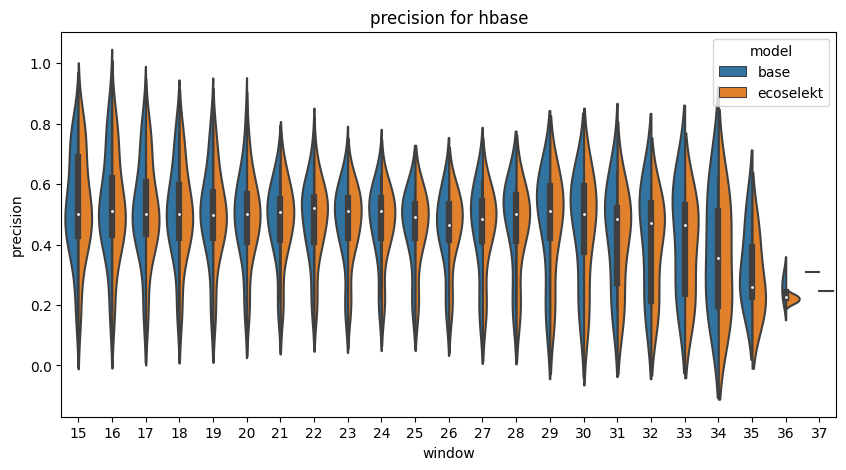

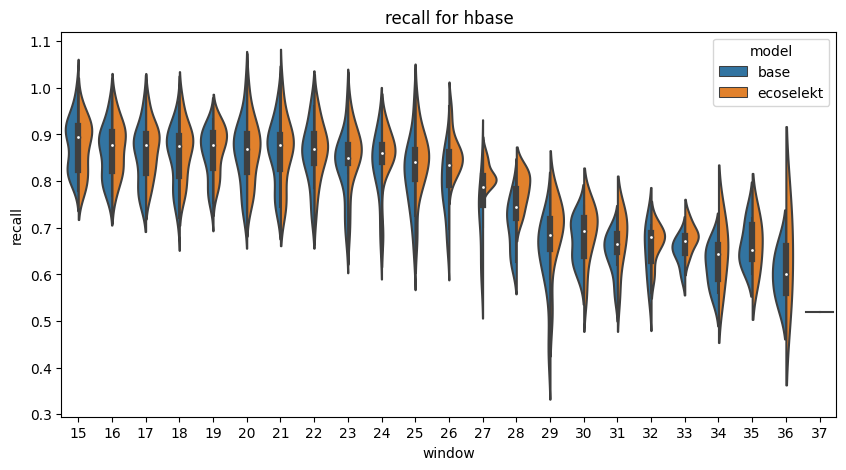

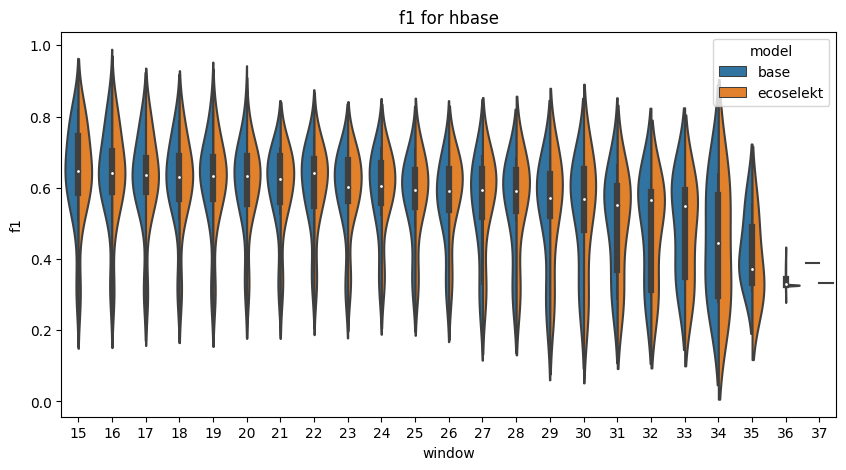

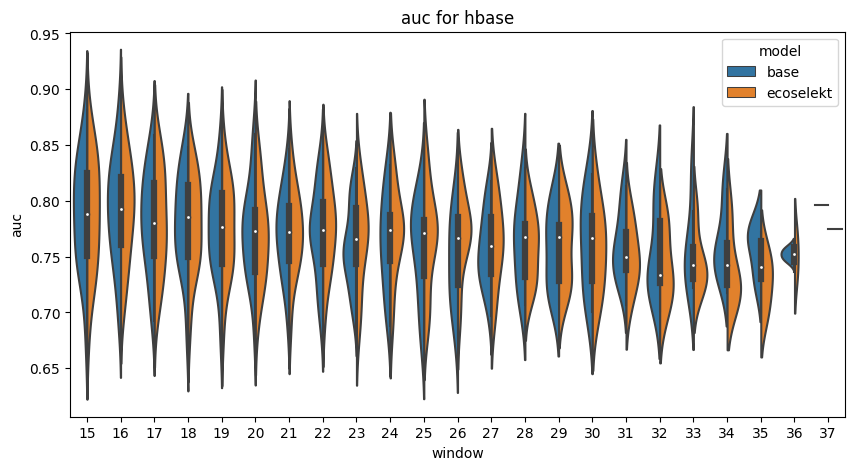

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


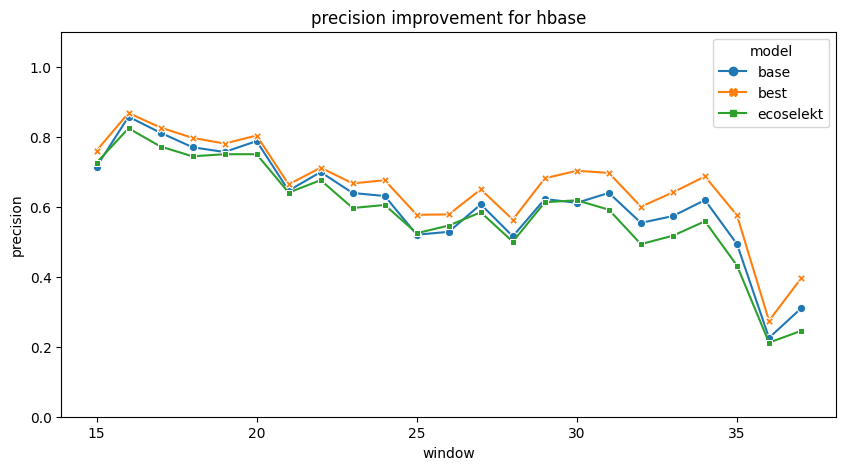

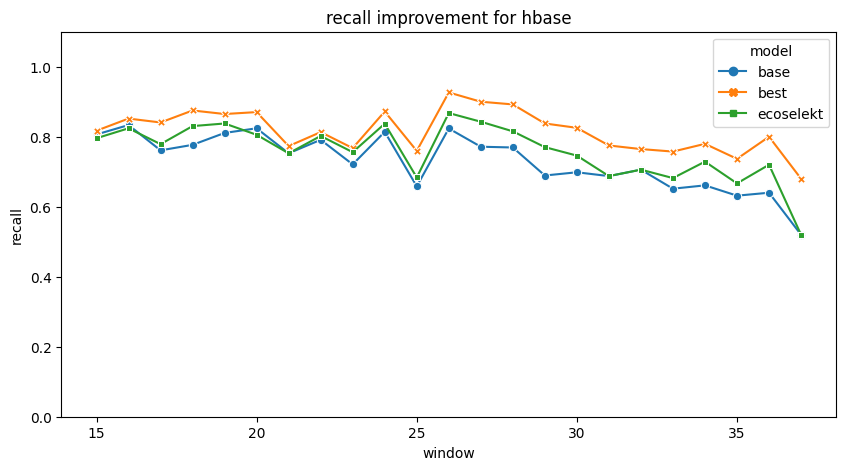

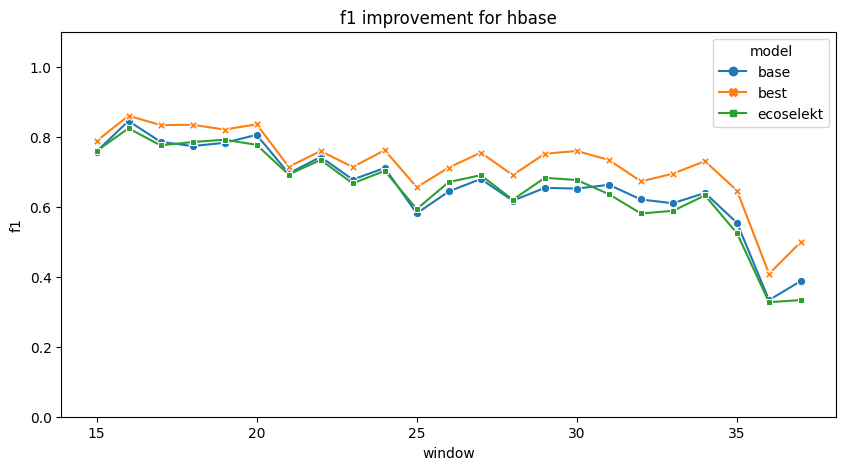

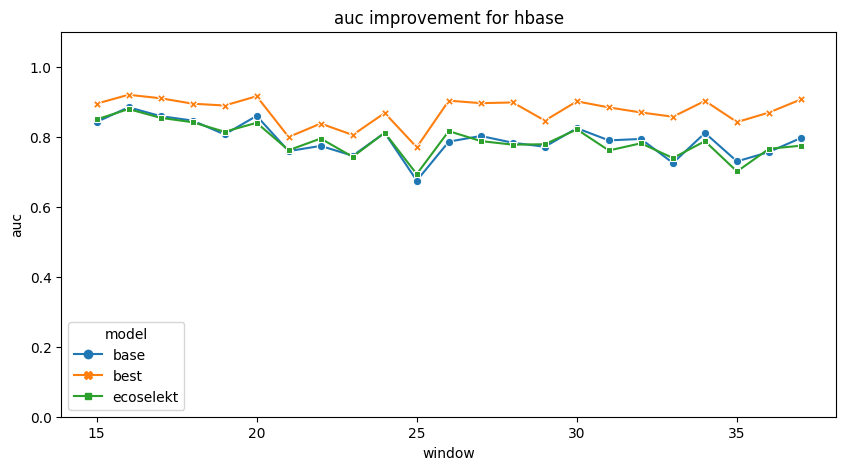

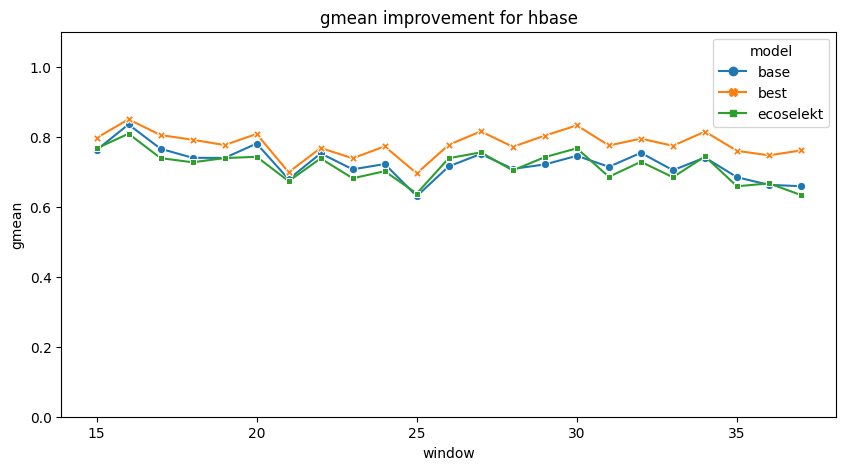

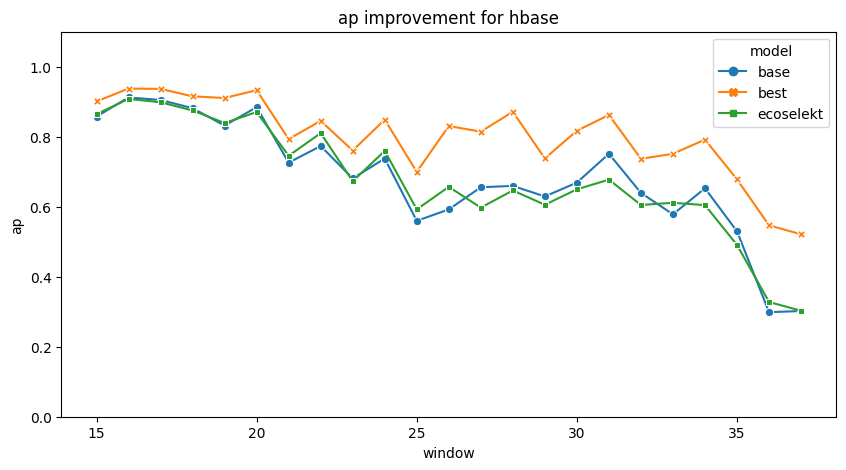

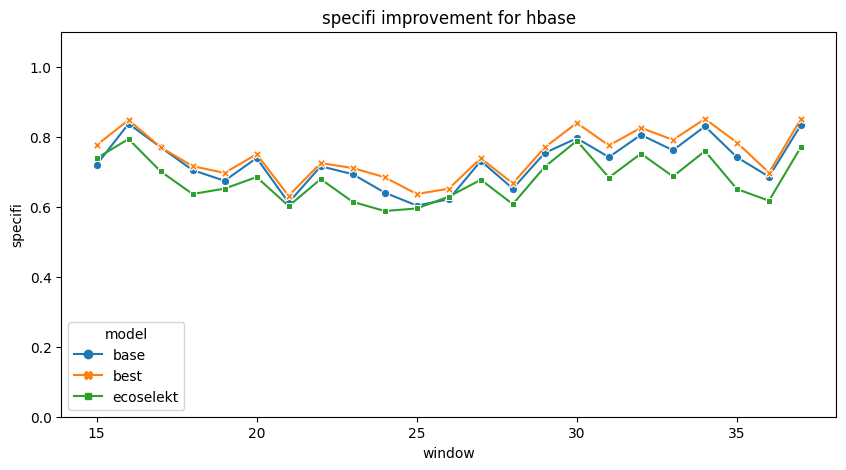

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

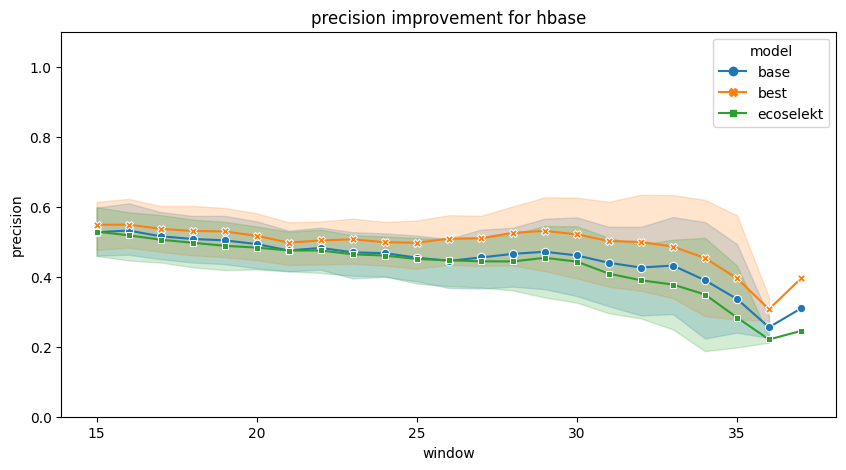

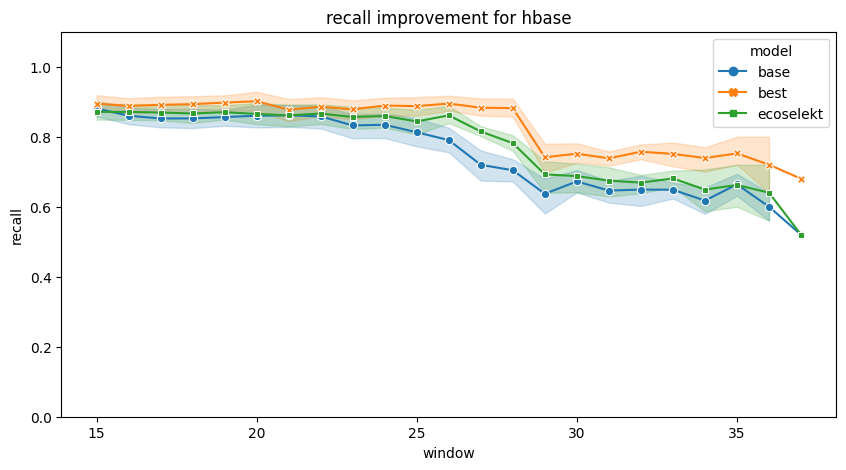

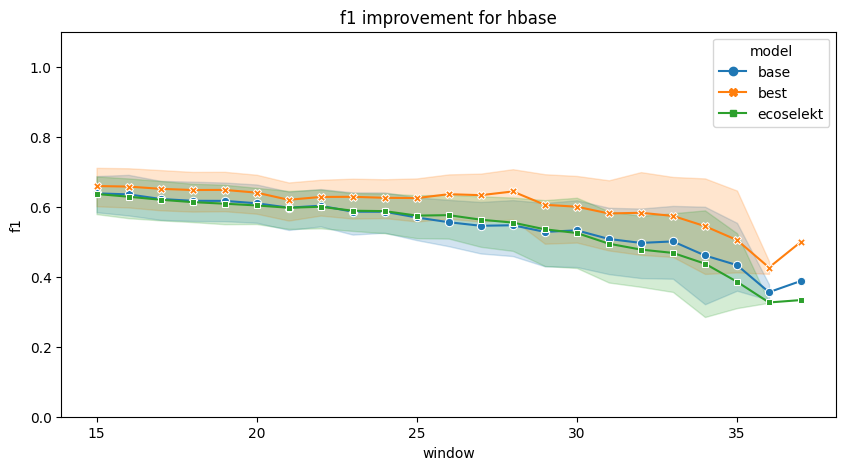

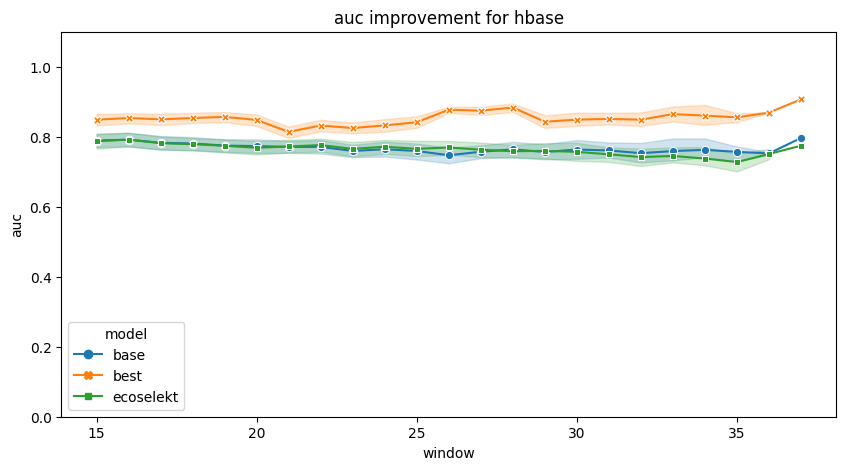

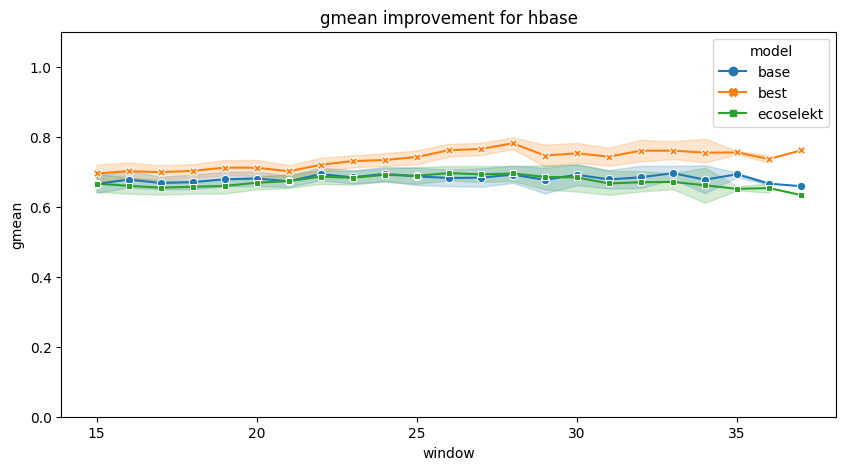

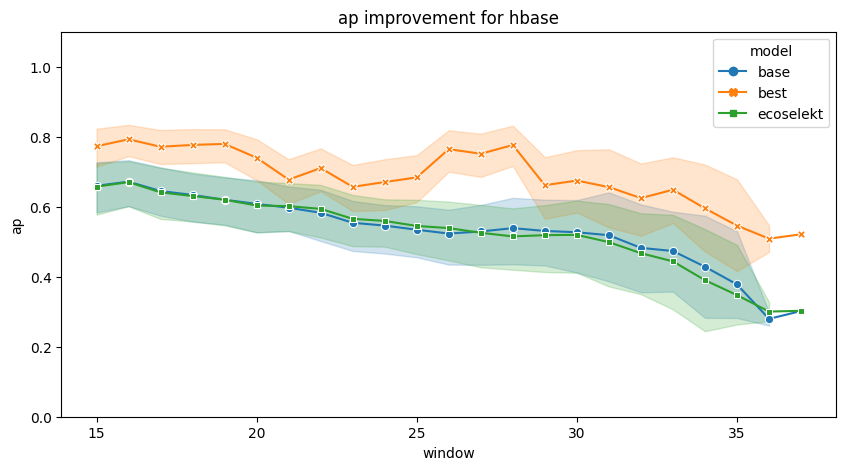

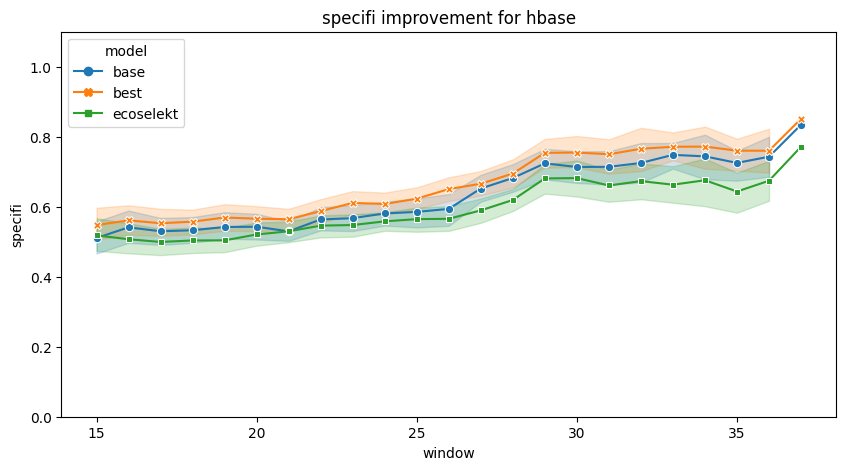

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.5202305316925049
Wilcoxon test significance: False


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.0004633944245426167
Wilcoxon test significance: True


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(55200, 4)


,commit_id,window,test_split,model_version
0,58eb59e7fb8846e7b47335d5f7ac298bcaca6f72,15,16,15
1,063243c88012241dc24fbcc39de349f49302d79e,15,16,15
2,65e7b7e2e102e7af8d39eeb9de00207273dca34c,15,16,15
3,3d8ee3a06e26d8535a0a3bac363739d77b11b060,15,16,15
4,7898e68fd46265863df476d5823121341a8e626b,15,16,15


In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(55200, 4)


,commit_id,window,test_split,model_version
0,0277f566162f289b1b5c3bab0e34cabf5c8c566c,15,16,15
1,063243c88012241dc24fbcc39de349f49302d79e,15,16,15
2,08bd55aab2c12b136e2b75941f0c4819bab2acef,15,16,15
3,0b0825ad8ef33064e419e6293731a8ce3331894c,15,16,14
4,0b737248c3857966a57cf0af14bd9cf81e9292f7,15,16,14


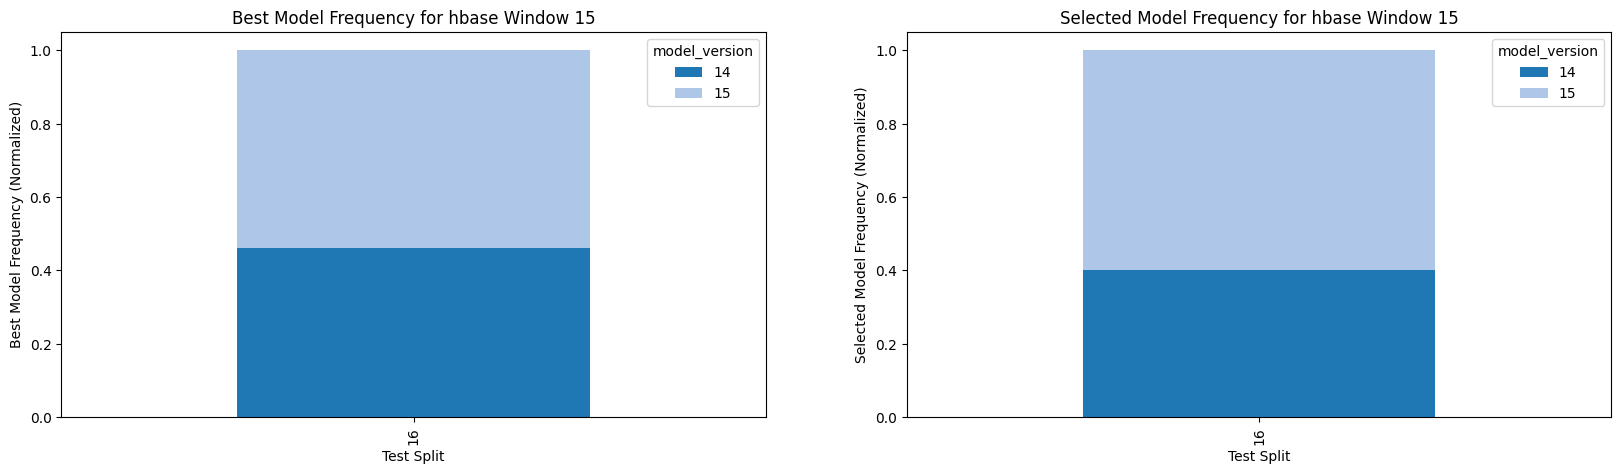

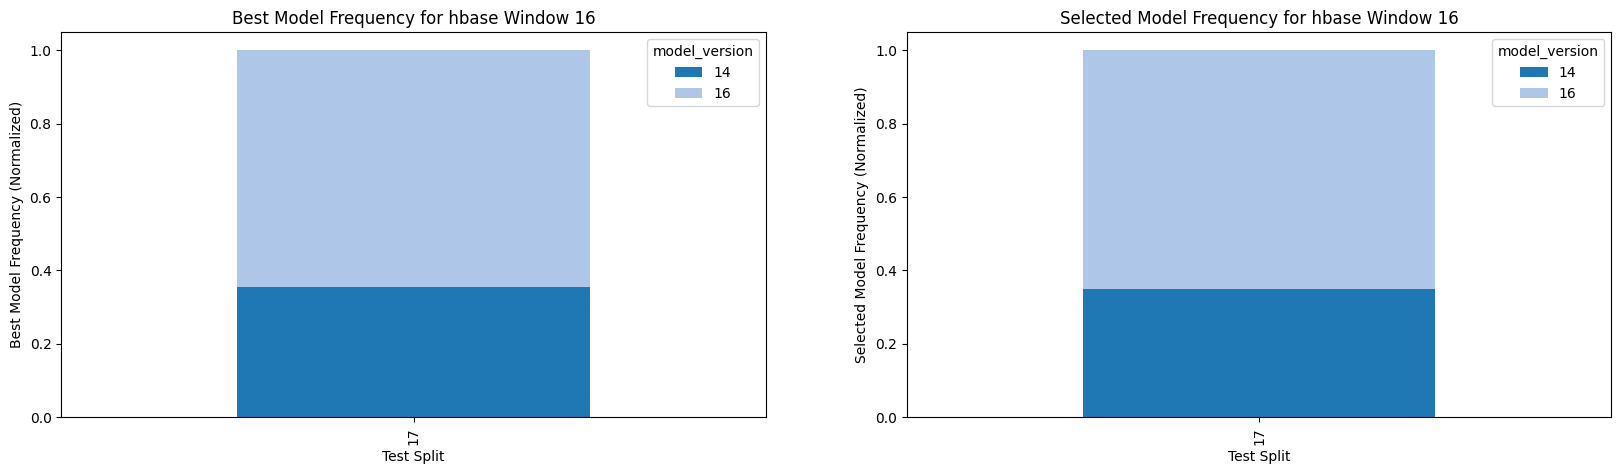

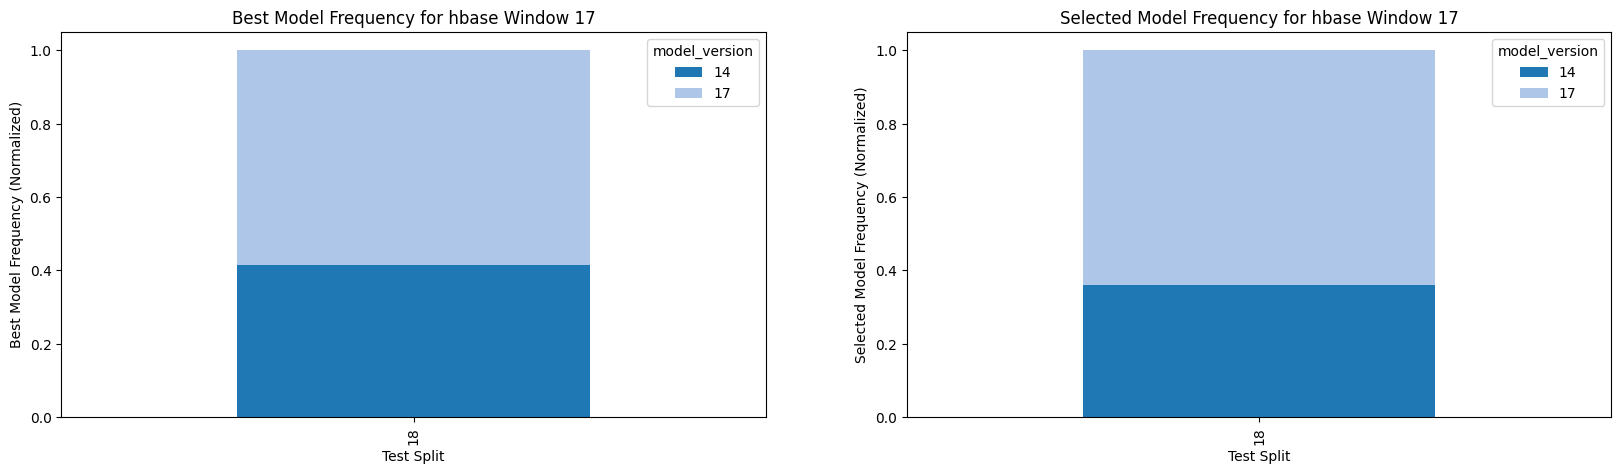

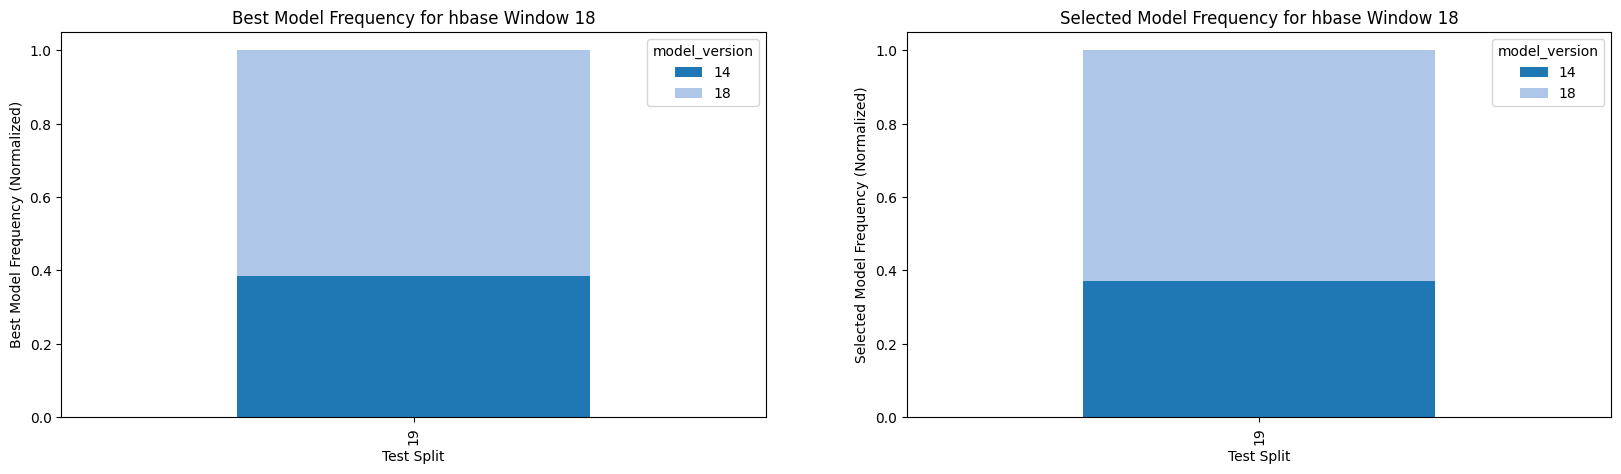

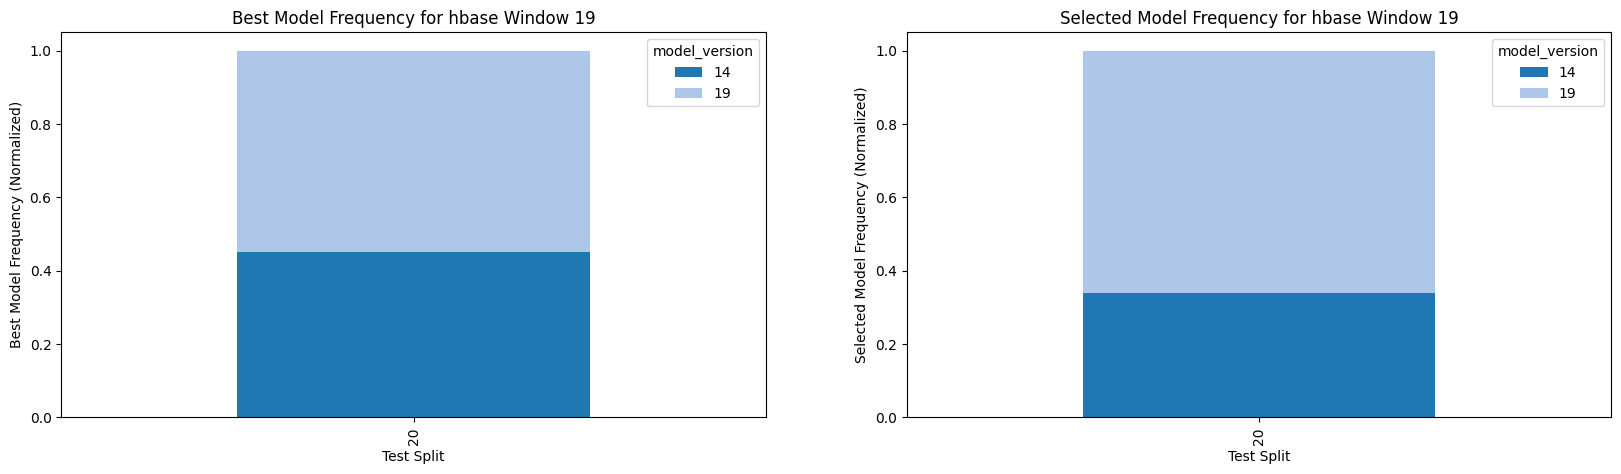

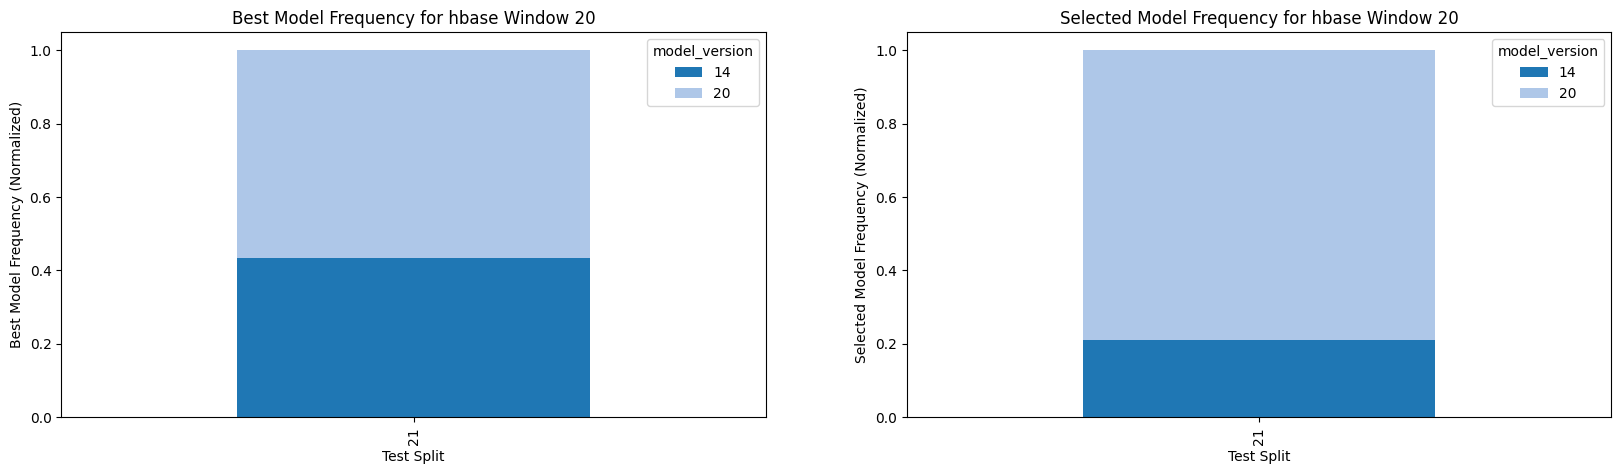

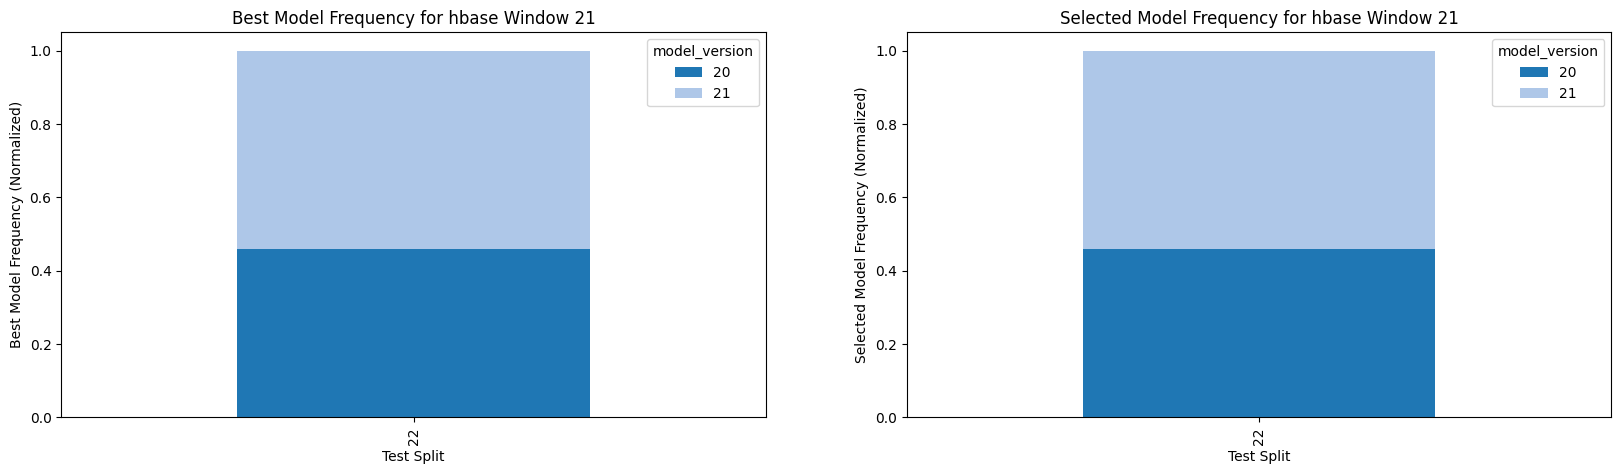

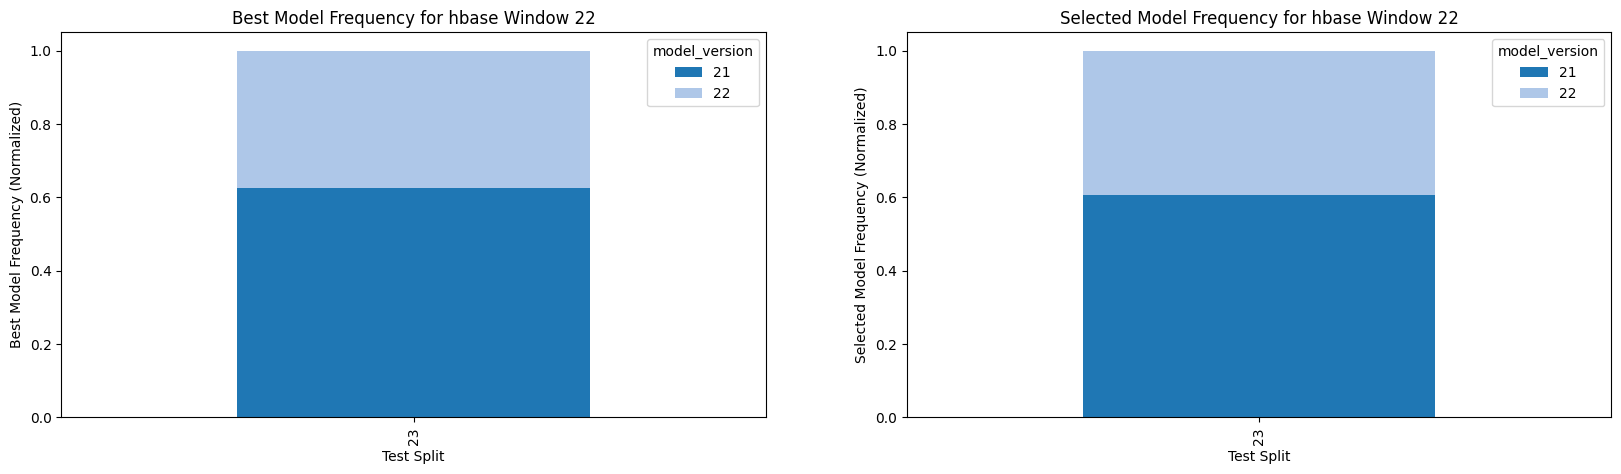

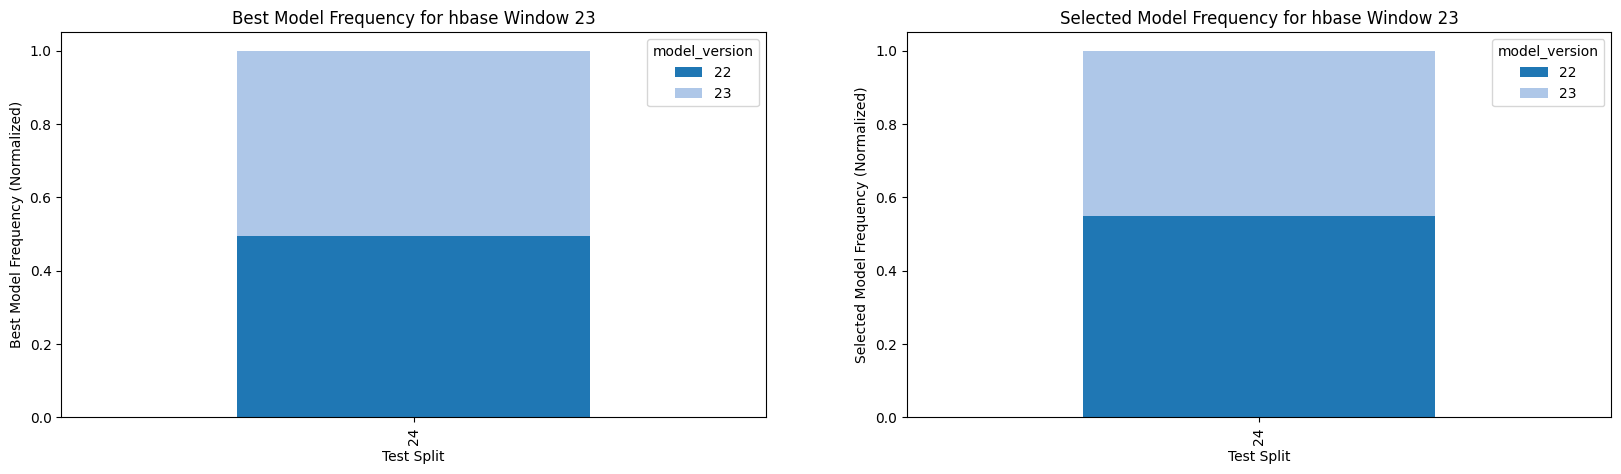

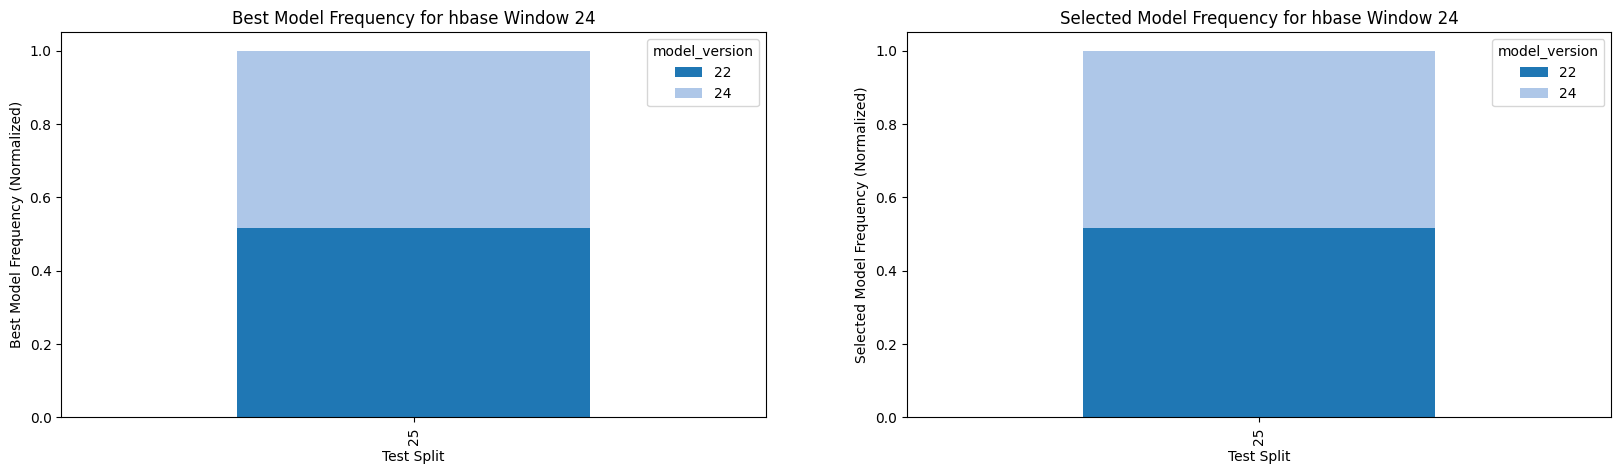

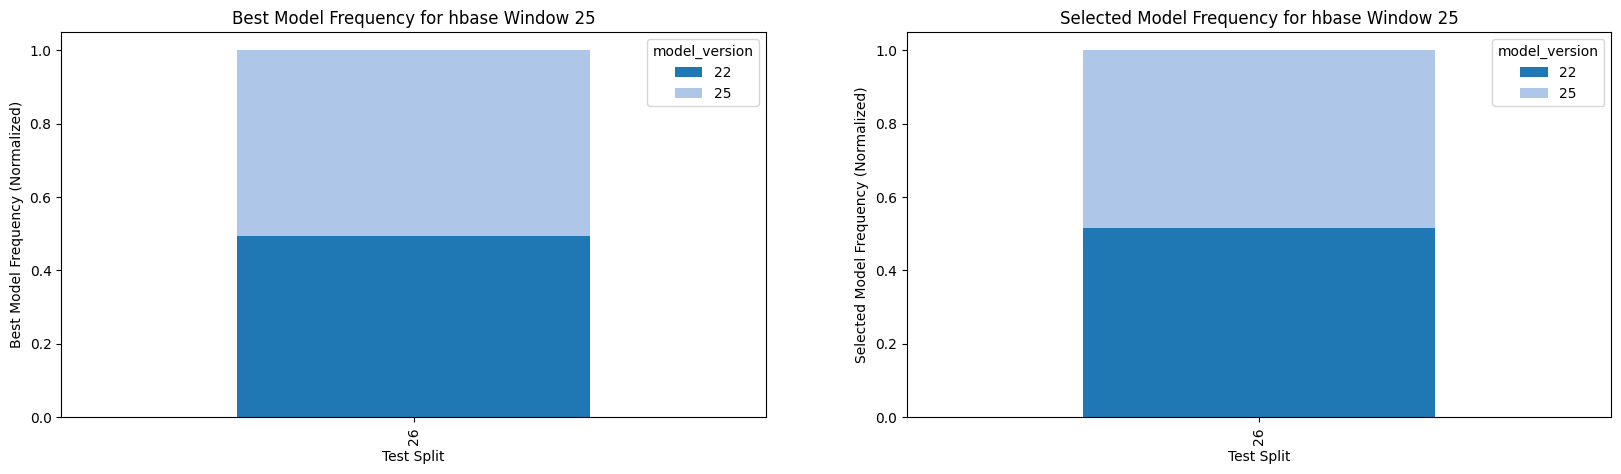

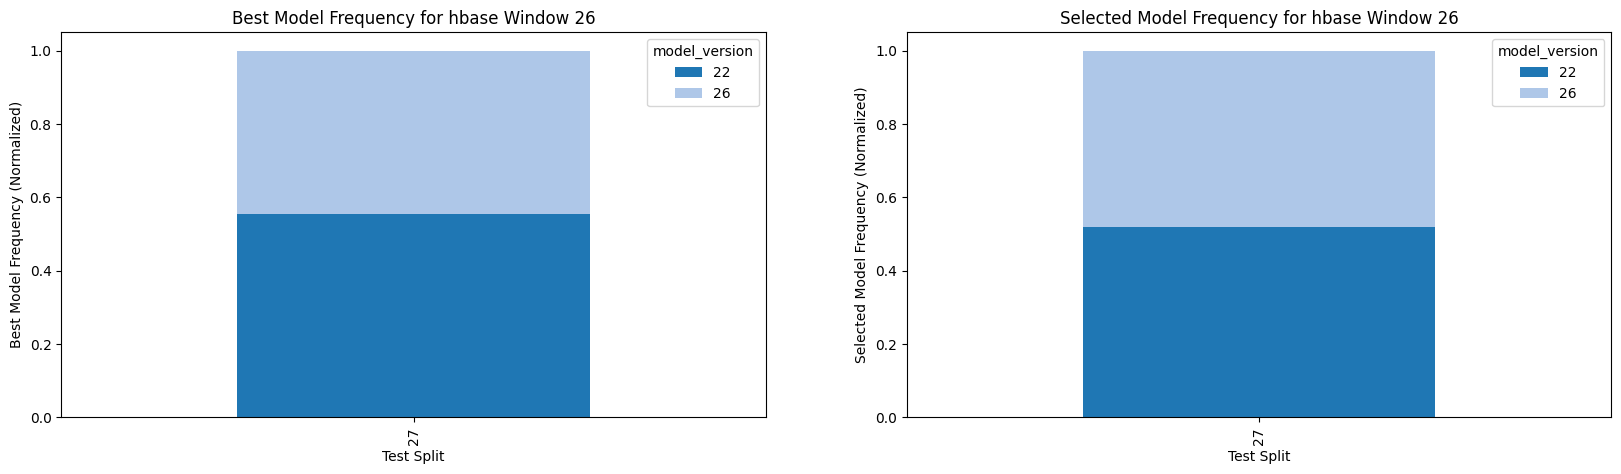

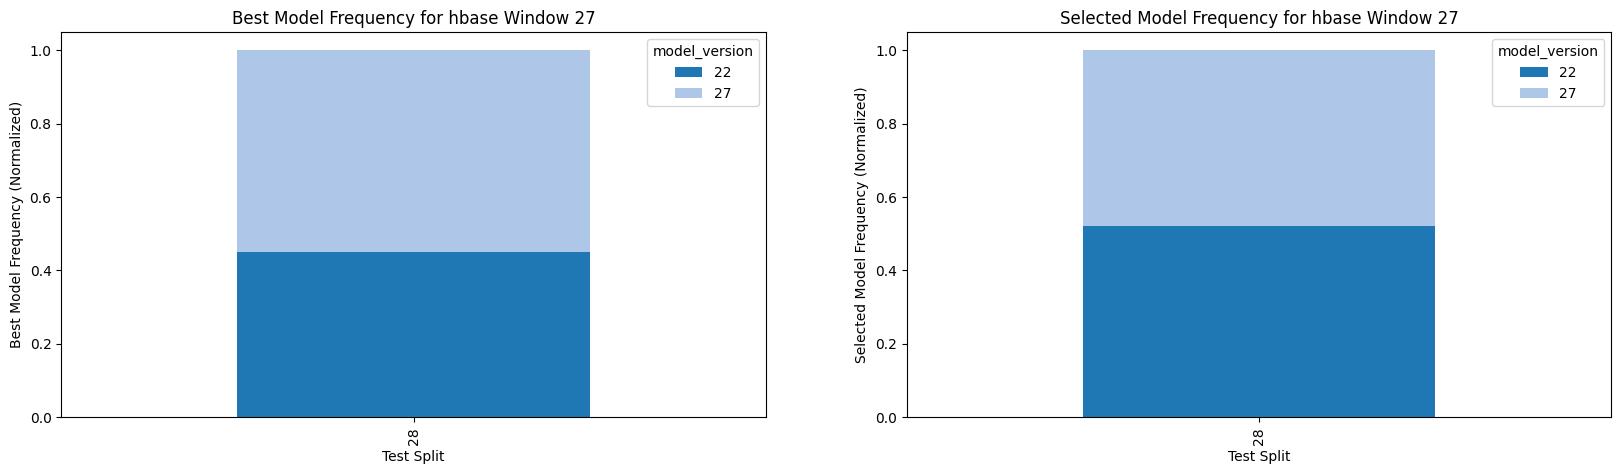

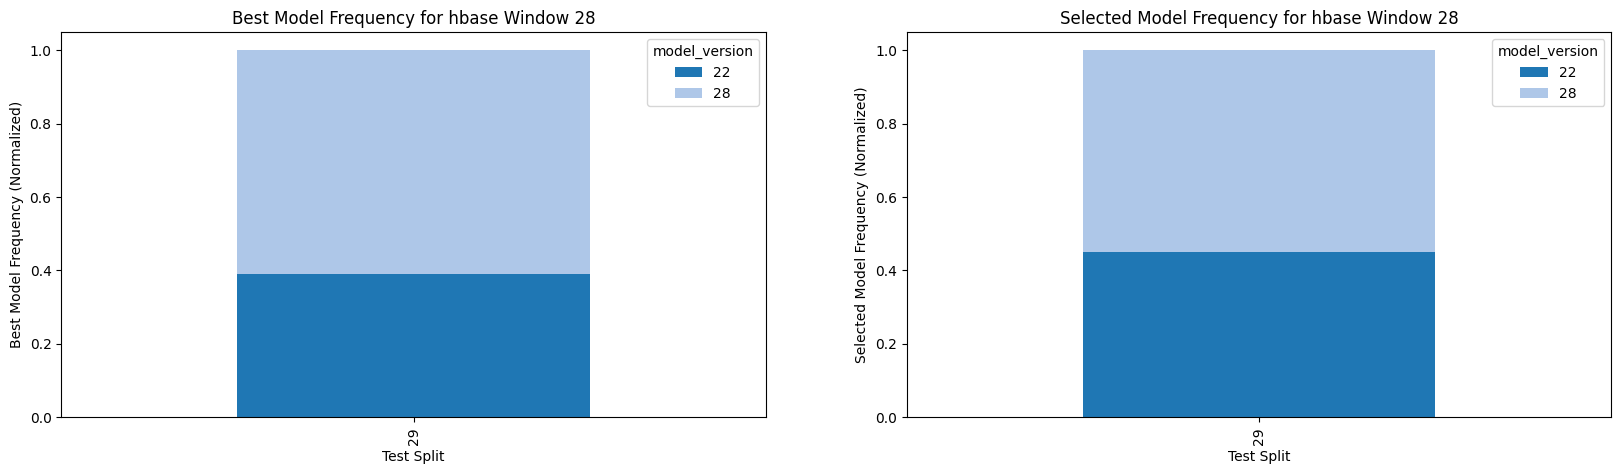

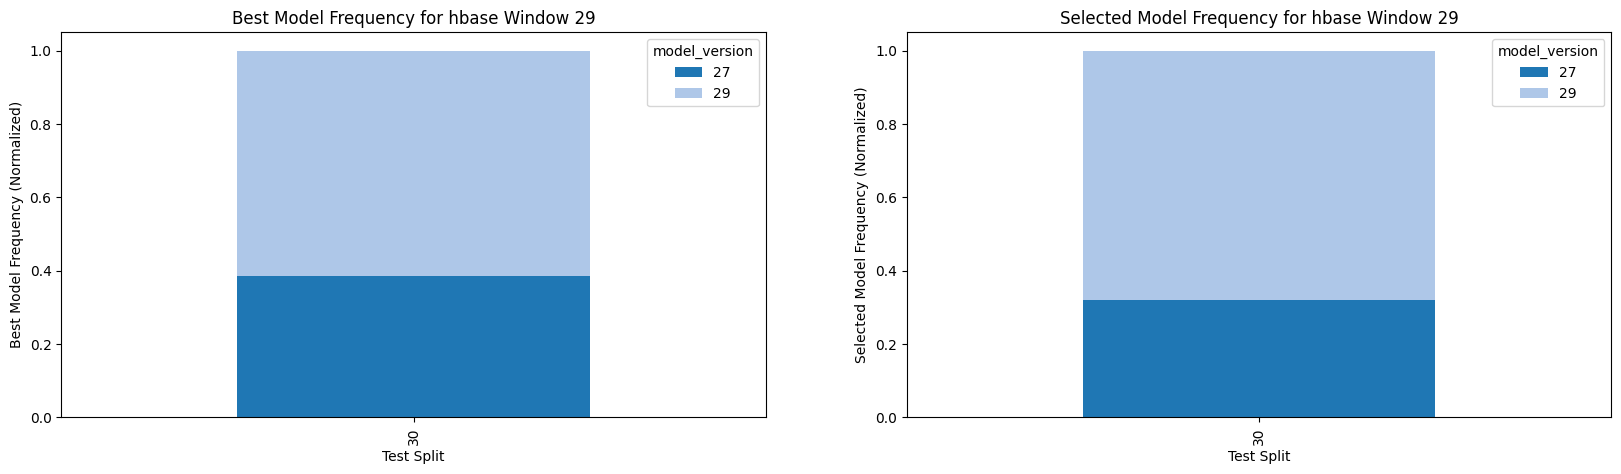

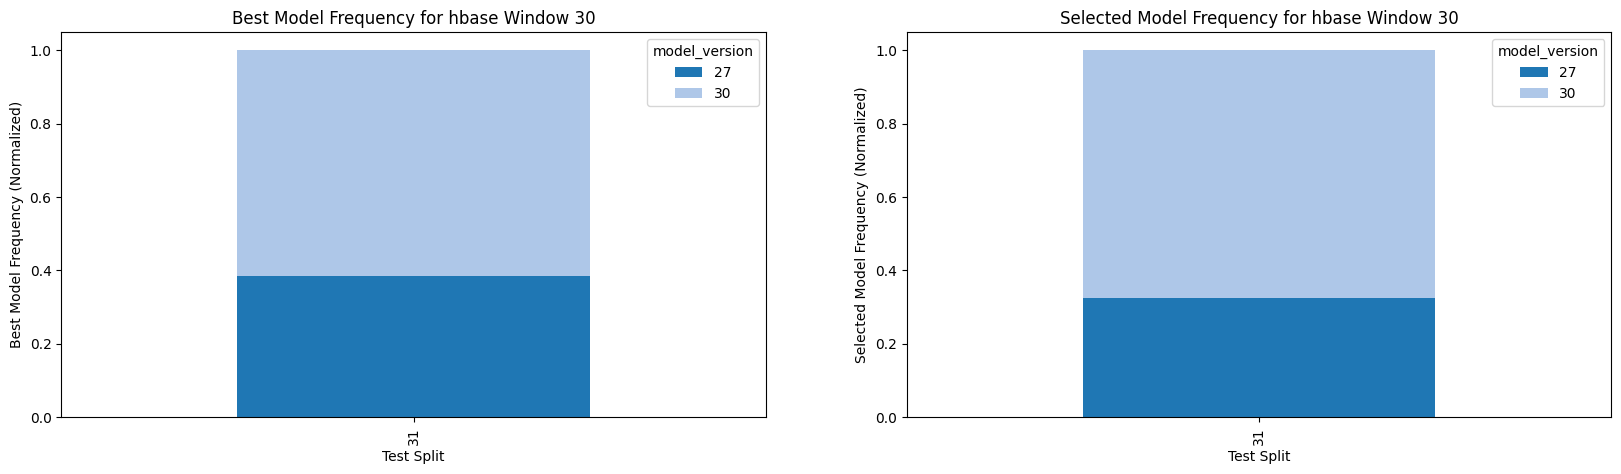

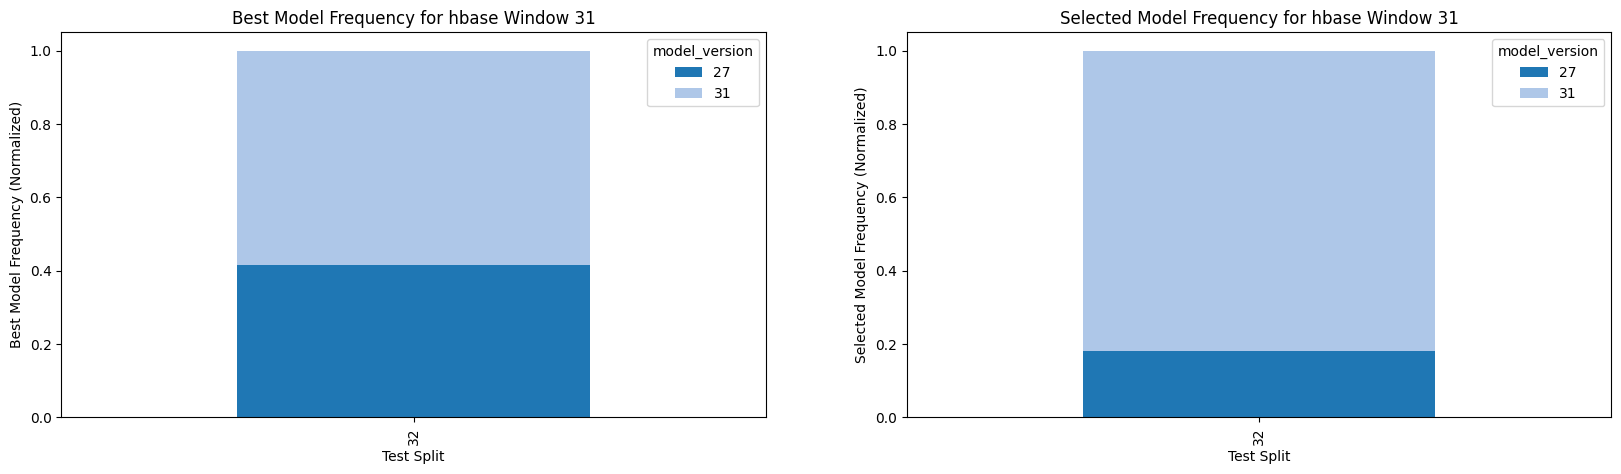

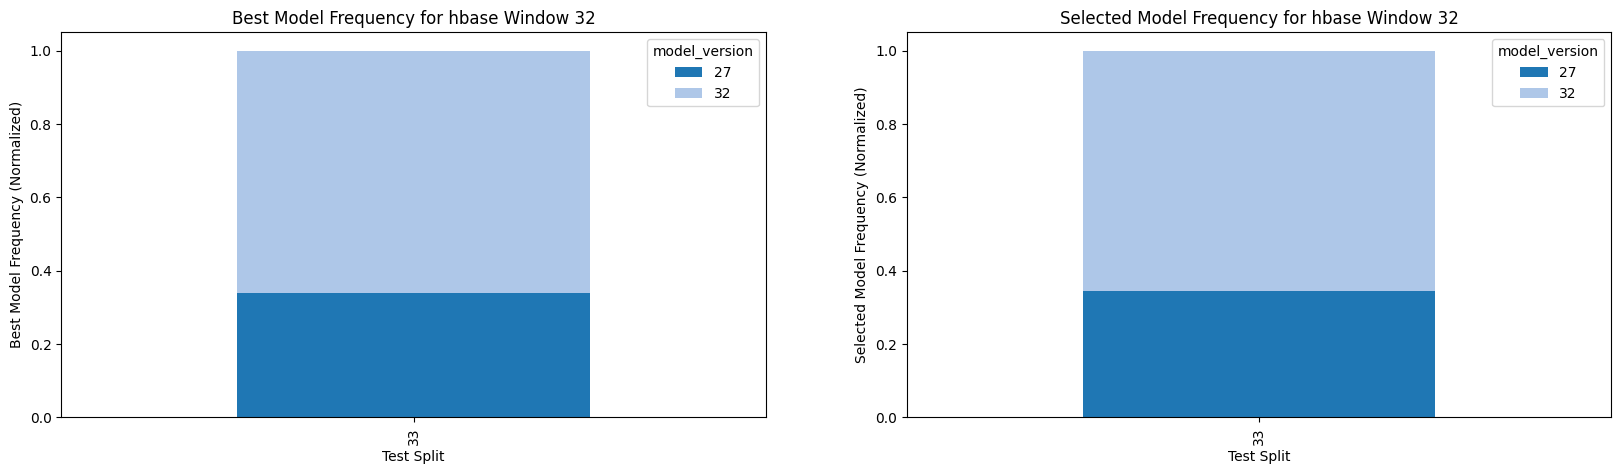

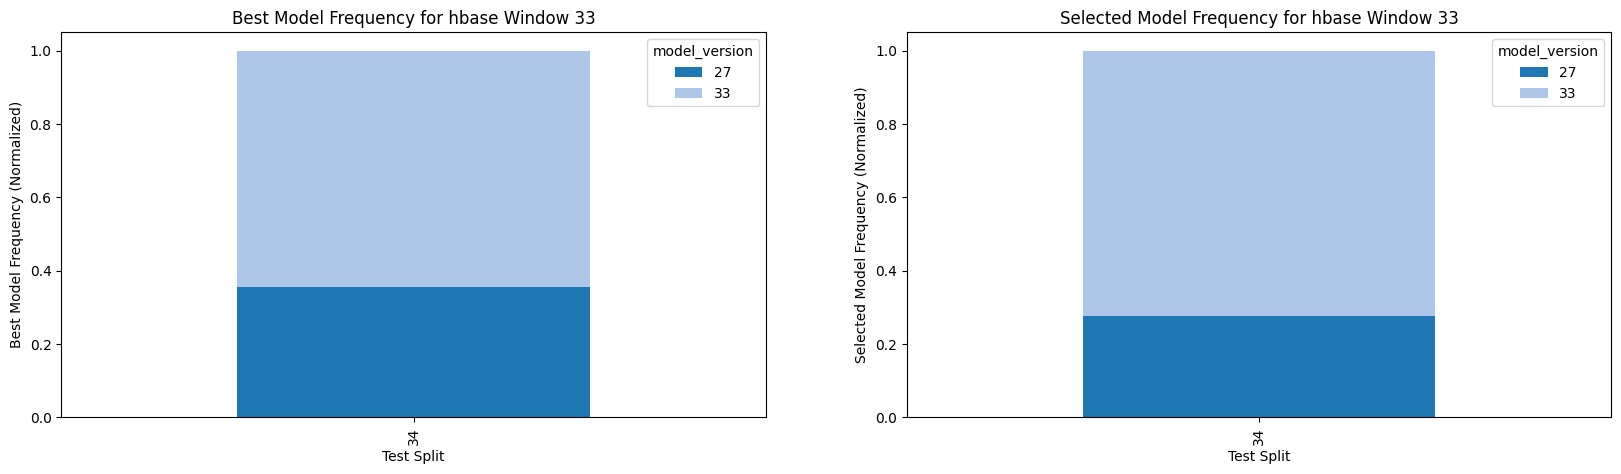

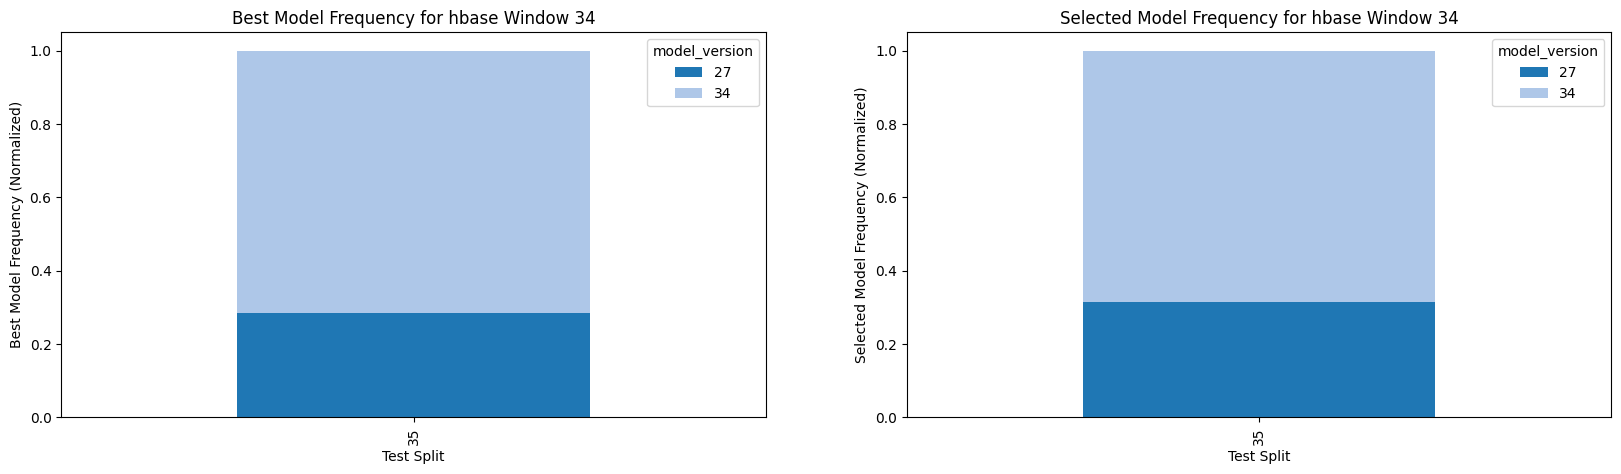

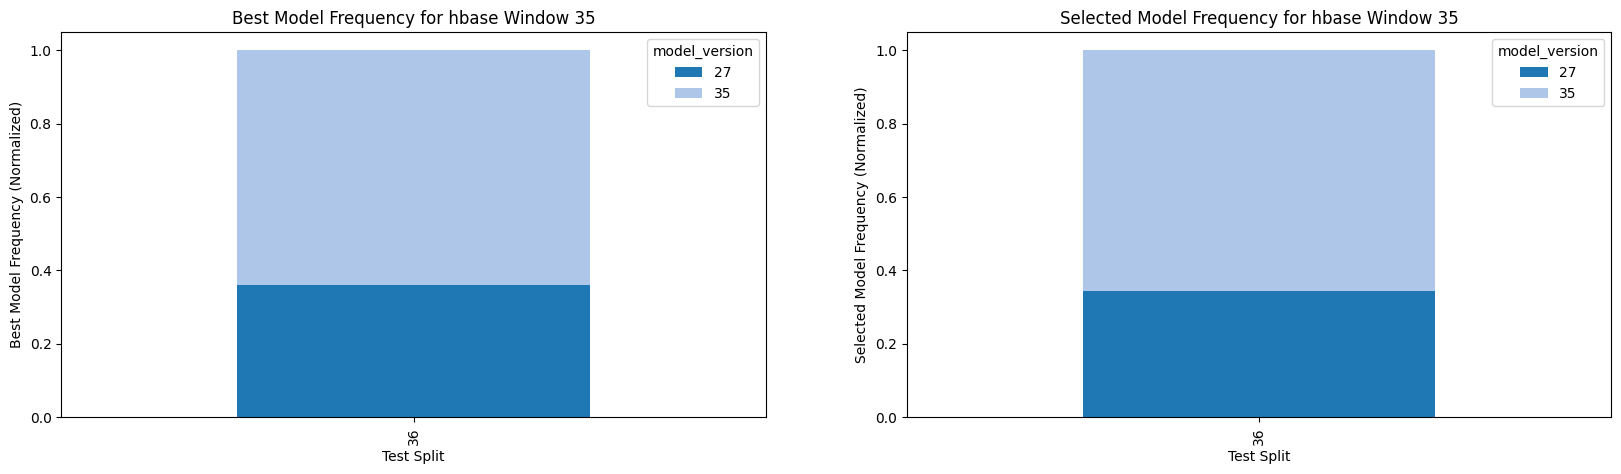

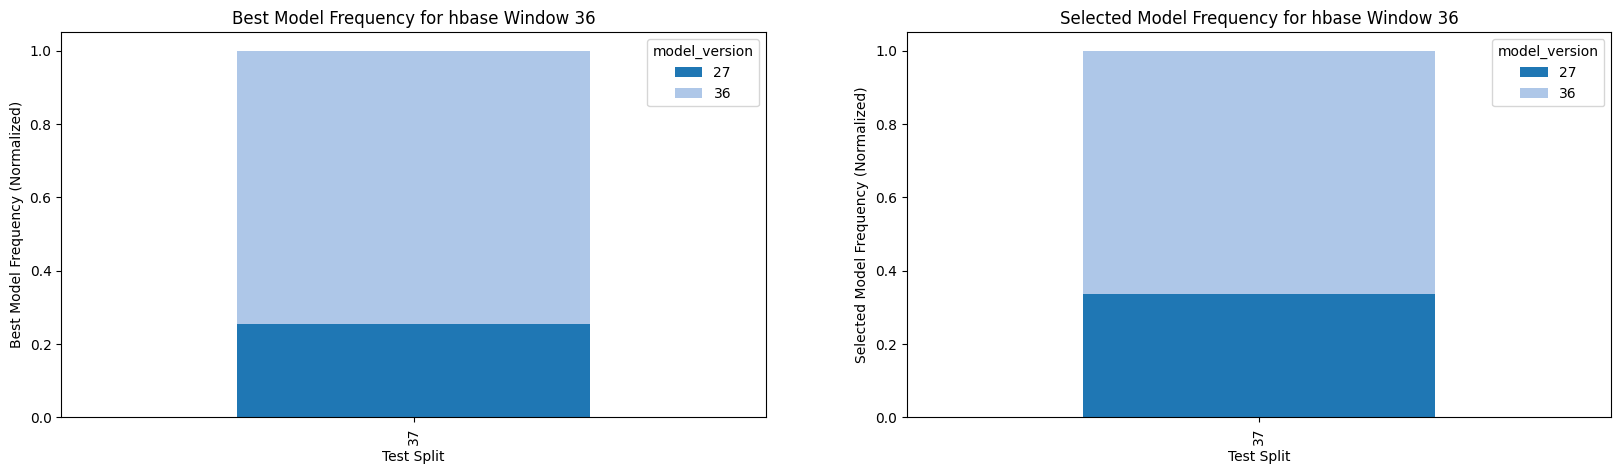

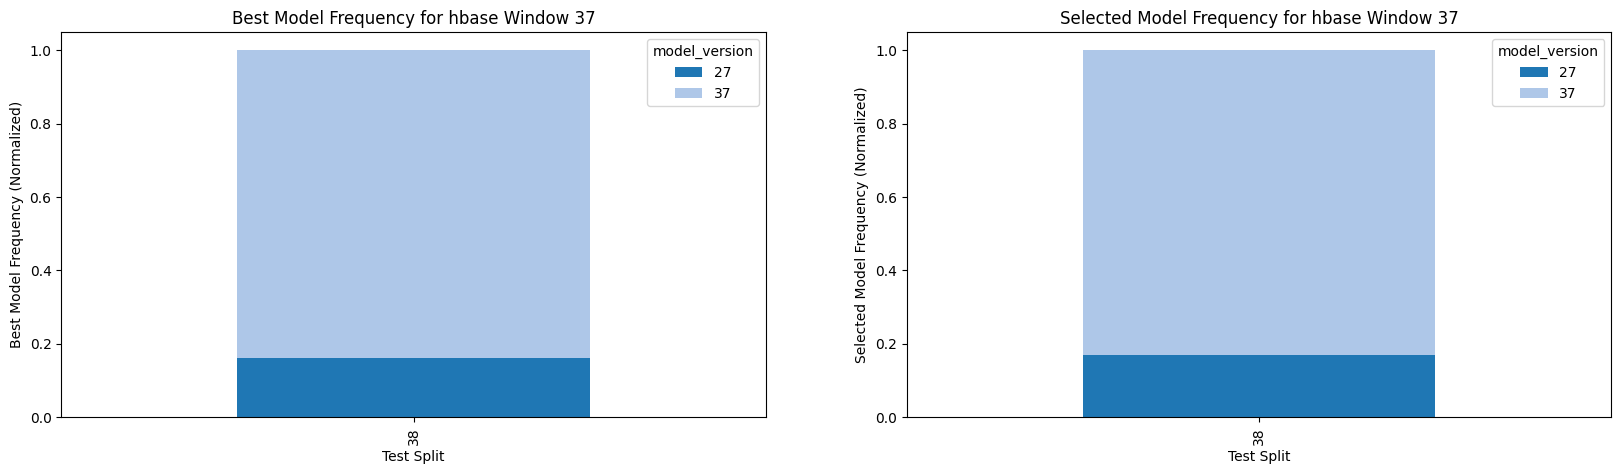

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_selektmodel_df = selektmodel_df[selektmodel_df["window"] == i]
    temp_selektmodel_df = temp_selektmodel_df[temp_selektmodel_df["test_split"] == i + 1]
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]
    # plot normalized best model frequency per test split side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    # find unique models
    unique_models = set(temp_bestmodel_df["model_version"].unique()) | set(temp_selektmodel_df["model_version"].unique())
    unique_models = list(unique_models)
    unique_models.sort()

    # creating color palette
    palette_colors = sns.color_palette('tab20')
    palette_dict = {model_version: color for model_version, color in zip(unique_models, palette_colors)}

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True, ax=ax1, color=palette_dict)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")
    
    # selected model
    model_frequency_by_test_split = temp_selektmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    q = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True, ax=ax2, color=palette_dict)
    q.set_xlabel("Test Split")
    q.set_ylabel("Selected Model Frequency (Normalized)")
    q.set_title(f"Selected Model Frequency for {PROJECT_NAME} Window {i}")
    plt.show()